In [3]:
#Importing required libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Bidirectional,LSTM, Embedding, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D,MaxPooling1D
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
!! pip install -q pyyaml h5py
import h5py
from tensorflow.keras import optimizers
from prettytable import PrettyTable
from keras.models import load_model
from keras.models import Model


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING DATASET**





In [5]:
#Read csv file using pandas
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [6]:
df.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290183 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    290183 non-null  object
 1   Song      290182 non-null  object
 2   Genre     290183 non-null  object
 3   Language  290179 non-null  object
 4   Lyrics    290148 non-null  object
dtypes: object(5)
memory usage: 11.1+ MB


In [8]:
df.Song.value_counts()

intro                                     163
home                                      148
hold on                                   116
have yourself a merry little christmas    113
goodbye                                   112
                                         ... 
sorte que a gente tem a vida inteira        1
som de porta-mala                           1
solteiro largado                            1
só eu amei                                  1
iceberg meadows                             1
Name: Song, Length: 164357, dtype: int64

**DATA CLEANING**

In [9]:
songs= df['Lyrics']

In [10]:
songs={'\n':' '}

In [11]:
df.replace(songs,regex=True,inplace=True)

In [12]:
df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate Fueled b..."
1,12 stones,broken,Rock,en,Freedom! Alone again again alone Patiently wai...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am But you can't i...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(290143, 5)

In [15]:
def repeated_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [16]:
df["Lyrics"] = df["Lyrics"].apply(lambda x: repeated_char(x))
df["Lyrics"].tail()


290178    I'm the best friend he's got I'd give him the ...
290179    Bad Boys Blue "I Totaly Mis You" I did you wro...
290180    Forgive me for the things That I never said to...
290181    The day they found a cure for AIDS The day the...
290182    Fourth of July has come, it's custom that we g...
Name: Lyrics, dtype: object

In [17]:
dictionary_length = 1000
input_length = 100

tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(df.Lyrics.values)
post_seq = tokenizer.texts_to_sequences(df.Lyrics.values)
post_seq_padded= sequence.pad_sequences(post_seq, maxlen=input_length)

In [18]:
post_seq_padded

array([[ 68,  23,  79, ..., 107,  23, 324],
       [ 25,  13,  96, ..., 431, 431, 431],
       [172,  34,  87, ...,  65,   3,   1],
       ...,
       [ 72,  71,   6, ..., 584,  19,  21],
       [  6,   1, 101, ..., 315,   6,  19],
       [ 62, 168,  19, ..., 182, 120, 148]], dtype=int32)

In [19]:
df['Genre'].value_counts()

Rock          121390
Pop           108693
Metal          20286
Jazz           13545
Folk            8644
Indie           8449
R&B             2793
Hip-Hop         2240
Electronic      2213
Country         1890
Name: Genre, dtype: int64

In [20]:
!pip install -U imbalanced-learn


     |████████████████████████████████| 199 kB 4.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [21]:
X = post_seq_padded
y = df['Genre'].values

In [22]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy={'Metal':40000,'Indie':20000,'R&B':5000,
                    'Folk':20000,'Electronic':25000,'Jazz':26000,'Hip-Hop':5000,'Country':5000})
X, y = over.fit_resample(X, y)
#under = RandomUnderSampler(sampling_strategy=u)
#steps = [('over', over), ('under', under), ('model', model)]
#pipeline = Pipeline(steps=steps)

In [23]:
X.shape

(376083, 100)

In [24]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
y_labels = label_as_binary.fit_transform(y)

In [25]:
#Splitting data into train, val and test
X_train,X_val,y_train,y_val = train_test_split(X,y_labels, test_size=0.3, random_state=23)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val, test_size=0.5, random_state=23)#0.4*50%=20%

In [36]:
#printing shapes of train data
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(263258, 100)
(56412, 100)
(56413, 100)


In [27]:
#parameters for the model
batch_size = 256
state_size = 8
num_classes = 10
embedding_size=50 

**MODELS**

 **SIMPLE RNN MODEL**

In [34]:
#Simple RNN model

SimpleRNN_model = tf.keras.Sequential()
SimpleRNN_model.add(Embedding(dictionary_length,
                    embedding_size,
                    input_length=input_length))
SimpleRNN_model.add(Dense(128,activation="relu"))
SimpleRNN_model.add(Dropout(0.5))
SimpleRNN_model.add(Dense(64,activation="relu"))
#SimpleRNN_model.add(Dropout(0.5))
#SimpleRNN_model.add(Bidirectional(layers.SimpleRNN(state_size, return_sequences=True)))
SimpleRNN_model.add(Bidirectional(layers.SimpleRNN(state_size, return_sequences=False)))
SimpleRNN_model.add(Dense(num_classes, activation='softmax'))

SimpleRNN_model.summary()

#Compiling Simple RNN model
SimpleRNN_model.compile(loss="categorical_crossentropy", 
                   optimizer='adam', 
                   metrics=['AUC'])

#Fit simple RNN model
hist_SimpleRNN = SimpleRNN_model.fit(X_train, y_train, 
           batch_size=batch_size,
           epochs=10, verbose=1,validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           50000     
                                                                 
 dense_3 (Dense)             (None, 100, 128)          6528      
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 dense_4 (Dense)             (None, 100, 64)           8256      
                                                                 
 bidirectional_1 (Bidirectio  (None, 16)               1168      
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                      

In [32]:
# Saving Simple_RNN model
SimpleRNN_model.save('part_1/Model_1.hdf5')

In [33]:
#evaluating simple RNN model on test dataset
score_SimpleRNN = SimpleRNN_model.evaluate(X_test, y_test, verbose=1)

1763/1763 [==============================] - 30s 17ms/step - loss: 1.5552 - auc: 0.8593


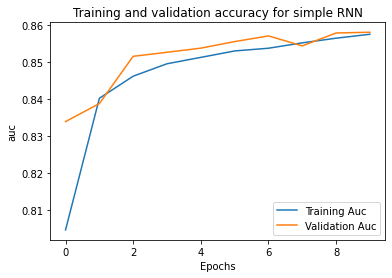

In [34]:
#Training and validation accuracy graph for simple RNN
plt.plot(hist_SimpleRNN.history['auc'],label="Training Auc")
plt.plot(hist_SimpleRNN.history['val_auc'],label="Validation Auc")
plt.title('Training and validation accuracy for simple RNN')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

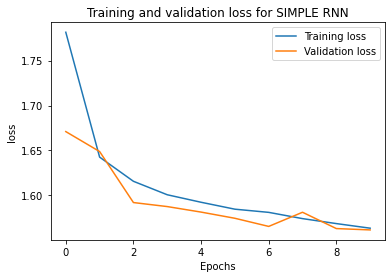

In [35]:
#Training and validation loss plot for simple RNN

plt.plot(hist_SimpleRNN.history['loss'],label="Training loss")
plt.plot(hist_SimpleRNN.history['val_loss'],label="Validation loss")
plt.title('Training and validation loss for SIMPLE RNN')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**SINGLE LAYER LSTM MODEL**

In [36]:
#single layer LSTM Model implementation

LSTM_model = tf.keras.Sequential()
embedding_layer = Embedding(dictionary_length, embedding_size, input_length=input_length)
LSTM_model.add(embedding_layer)
LSTM_model.add(Bidirectional(LSTM(64)))
LSTM_model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
#LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(num_classes, activation='softmax'))

LSTM_model.summary()

#Compiling single layer LSTM model
LSTM_model.compile(loss="categorical_crossentropy", 
                   optimizer='adam', 
                   metrics=['AUC'])

#fitting LSTM model
history_LSTM = LSTM_model.fit(X_train, y_train, 
           batch_size=batch_size,
           epochs=10, verbose=1,validation_data=(X_val, y_val)) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           50000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              58880     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 117,786
Trainable params: 117,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1029/1029 [==============================] - 22s 17ms/step - loss: 1.9750 - auc: 0.8165 - val_loss: 1.6

In [37]:
#saving LSTM model
LSTM_model.save('part_1/Model_2.hdf5')


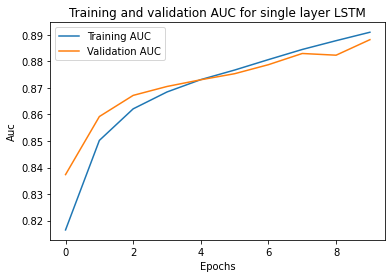

In [38]:
#Training and validation accuracy graph for single layer lstm model
plt.plot(history_LSTM.history['auc'],label="Training AUC")
plt.plot(history_LSTM.history['val_auc'],label="Validation AUC")
plt.title('Training and validation AUC for single layer LSTM')
plt.xlabel('Epochs')
plt.ylabel('Auc')
plt.legend()

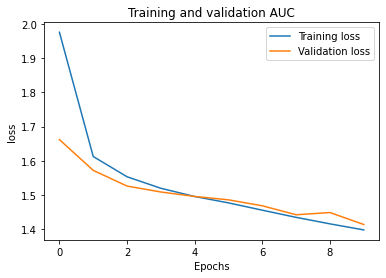

In [40]:
#Training and validation loss plot for single layer LSTM model

plt.plot(history_LSTM.history['loss'],label="Training loss")
plt.plot(history_LSTM.history['val_loss'],label="Validation loss")
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [41]:
#evaluating single layer LSTM model on test dataset
score_LSTM = LSTM_model.evaluate(X_test, y_test, verbose=1)

1763/1763 [==============================] - 11s 6ms/step - loss: 1.4087 - auc: 0.8890


**MULTI LAYER LSTM MODEL**

In [42]:
#Multi layer LSTM model
MultiLSTM_model = tf.keras.Sequential()
embedding_layer = Embedding(dictionary_length, embedding_size, input_length=input_length)
MultiLSTM_model.add(embedding_layer)
MultiLSTM_model.add(Bidirectional(LSTM(32,return_sequences=True)))
MultiLSTM_model.add(Bidirectional(LSTM(32,return_sequences=True)))
MultiLSTM_model.add(Bidirectional(LSTM(32,return_sequences=False)))
MultiLSTM_model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
MultiLSTM_model.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
MultiLSTM_model.add(Dense(num_classes, activation='softmax'))

MultiLSTM_model.summary()

#Compiling multi LSTM model
MultiLSTM_model.compile(loss="categorical_crossentropy", 
                   optimizer='adam', 
                   metrics=['AUC'])

#Fitting Multi LSTM model
history_MultiLSTM = MultiLSTM_model.fit(X_train, y_train, 
           batch_size=batch_size,
           epochs=10, verbose=1,validation_data=(X_val, y_val)) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           50000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 64)          21248     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

In [43]:
#saving Multi Layer LSTM Model
MultiLSTM_model.save('part_1/Model_3.hdf5')


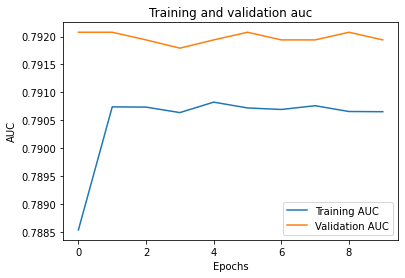

In [44]:
#Training and validation accuracy graph for Multi layer LSTM model
plt.plot(history_MultiLSTM.history['auc'],label="Training AUC")
plt.plot(history_MultiLSTM.history['val_auc'],label="Validation AUC")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

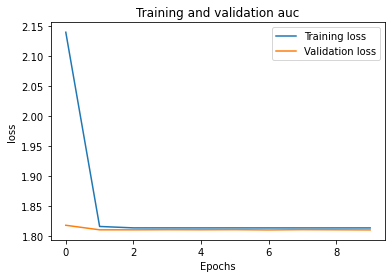

In [45]:

#Training and validation loss plot for multi layer LSTM model

plt.plot(history_MultiLSTM.history['loss'],label="Training loss")
plt.plot(history_MultiLSTM.history['val_loss'],label="Validation loss")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [46]:
#evaluating on test dataset
score_MultiLSTM = MultiLSTM_model.evaluate(X_test, y_test, verbose=1)

1763/1763 [==============================] - 26s 15ms/step - loss: 1.8069 - auc: 0.7919


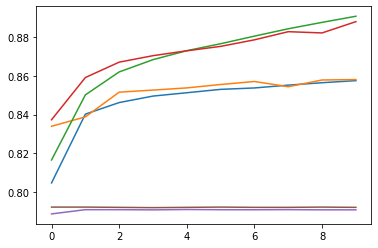

In [47]:
plt.plot(hist_SimpleRNN.history['auc'],label="Training AUC SimpleRNN")
plt.plot(hist_SimpleRNN.history['val_auc'],label="Validation AUC SimpleRNN")
plt.plot(history_LSTM.history['auc'],label="Training AUC LSTM")
plt.plot(history_LSTM.history['val_auc'],label="Validation AUC LSTM")
plt.plot(history_MultiLSTM.history['auc'],label="Training AUC MultiLSTM")
plt.plot(history_MultiLSTM.history['val_auc'],label="Validation AUC MultiLSTM")

**PRE-TRAINED EMBEDDINGS FROM TENSORFLOW HUB**


In [48]:
from sklearn.preprocessing import LabelBinarizer
target = df['Genre'].values
label_as_binary = LabelBinarizer()
target = label_as_binary.fit_transform(target)

In [49]:
df.shape

(290143, 5)

In [50]:
target.shape


(290143, 10)

In [51]:
#Splitting the data into training, validate and test
train_ratio = 0.50
validation_ratio = 0.30
test_ratio = 0.20
x_train1, x_test1, y_train1, y_test1 = train_test_split(df['Lyrics'].values, target, test_size=1 - train_ratio)

x_val1, x_test1, y_val1, y_test1 = train_test_split(x_test1, y_test1, test_size=test_ratio/(test_ratio + validation_ratio)) 

**GNEWS-SWIVEL EMBEDDING**

In [52]:
#Adding the Pre trained word embedding layer to the model
import tensorflow_hub as hub


hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2",input_shape=[], dtype=tf.string)
pre_trained_model = Sequential()
pre_trained_model.add(hub_layer)
pre_trained_model.add(tf.keras.layers.Dense(16, activation='relu'))
pre_trained_model.add(Dropout(0.3))
pre_trained_model.add(tf.keras.layers.Dense(10,activation='softmax'))

pre_trained_model.summary()


#Compile the model with required optimizer and loss function
pre_trained_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['AUC'])

#Model is fitted to Training data and is validated with validation data
hist_pre_trained = pre_trained_model.fit(x_train1, y_train1,
          batch_size=256,
          epochs=10,
          validation_data=(x_val1, y_val1))

#Testing the accuracy of model using the test data.
print('\n => Evaluating the model on test data')
pre_trained_results = pre_trained_model.evaluate(x_test1, y_test1, batch_size=256)
test_loss, pre_trained_model_test_acc = pre_trained_results
print("Model accuracy on test data: {}% ".format( round(pre_trained_model_test_acc*100,2)))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 48,191,586
Trainable params: 986
Non-trainable params: 48,190,600
_________________________________________________________________
Epoch 1/10
567/567 [==============================] - 10s 16ms/step - loss: 1.5372 - auc: 0.8649 - val_loss: 1.3520 - val_auc: 0.8940
Epoch 2/10
567/567 [==================

In [53]:
auc_pre_trained_model_test_acc = round(pre_trained_model_test_acc*100,2)

In [54]:
#Saving pre_trained_model
pre_trained_model.save('/content/drive/MyDrive/Deep Learning/part1/Model_4.hdf5')


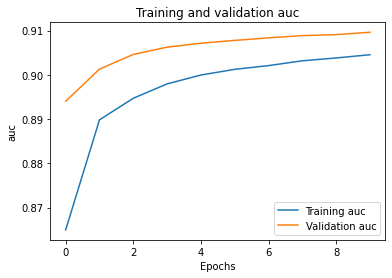

In [55]:
#Training and validation accuracy graph for gnew-swivel pretrained embedding model
plt.plot(hist_pre_trained.history['auc'],label="Training auc")
plt.plot(hist_pre_trained.history['val_auc'],label="Validation auc")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

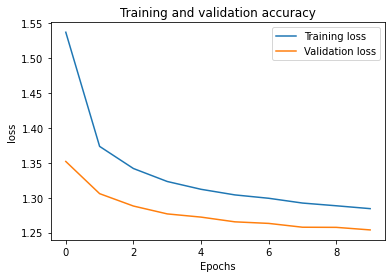

In [56]:
#Training and validation loss plot for gnews model

plt.plot(hist_pre_trained.history['loss'],label="Training loss")
plt.plot(hist_pre_trained.history['val_loss'],label="Validation loss")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**FLY MODEL**

In [57]:
#Pre-trained embeddings in Tensorflow hub

model_fly = Sequential()
model_fly.add(Embedding(dictionary_length,embedding_size,
                    input_length=input_length))
model_fly.add(GlobalAveragePooling1D()) #taking an average of all our word embeddings
model_fly.add(Dense(200, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model_fly.add(Dense(10,activation='softmax'))

model_fly.summary()

#Compile the model with required optimizer and loss function
model_fly.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['AUC'])

#Model is fitted to Training data and is validated with validation data

hist_fly = model_fly.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val, y_val))

#Testing the accuracy of model using the test data.
print('\n => Evaluating the model on test data')
model_fly_results = model_fly.evaluate(X_test, y_test, batch_size=batch_size)
test_loss, model_fly_test_acc = model_fly_results
print("Model accuracy on test data: {}% ".format( round(model_fly_test_acc*100,2)))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           50000     
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_10 (Dense)            (None, 200)               10200     
                                                                 
 dense_11 (Dense)            (None, 10)                2010      
                                                                 
Total params: 62,210
Trainable params: 62,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1029/1029 [==============================] - 6s 5ms/step - loss: 1.9671 - auc: 0.8058 - val_loss: 1.7249 

In [58]:
auc_model_fly_test_acc = round(model_fly_test_acc*100,2)

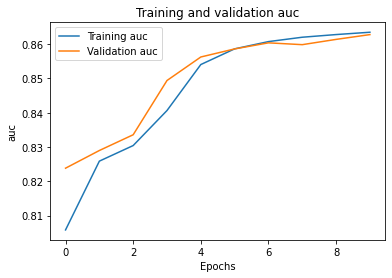

In [60]:
#Training and validation accuracy graph for fly pretrained embedding model
plt.plot(hist_fly .history['auc'],label="Training auc")
plt.plot(hist_fly .history['val_auc'],label="Validation auc")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

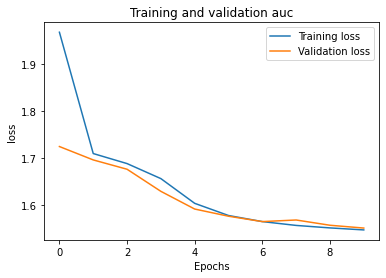

In [111]:
#Training and validation loss plot for fly model

plt.plot(hist_fly .history['loss'],label="Training loss")
plt.plot(hist_fly .history['val_loss'],label="Validation loss")
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**CNN FOR TEXT CLASSIFICATION**

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(263258, 100)
(263258, 10)
(56412, 100)
(56412, 10)
(56413, 100)
(56413, 10)


**CNN KERNEL SIZE 5**

In [64]:
#CNN with kernel size=5
#CNN With Text classification with kernal size = 5

CNN_model = Sequential()
CNN_model.add(Embedding(dictionary_length,embedding_size,
                    input_length=input_length))
CNN_model.add(Conv1D(50,5,padding='valid',activation='relu',strides=1,kernel_regularizer=tf.keras.regularizers.l2(0.2)))
#CNN_model.add(Dropout(0.25))
CNN_model.add(GlobalAveragePooling1D())
#CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))

CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['AUC'])

CNN_model.summary()


#Fitting the model to the test data and validating with the validation data
hist_cnn = CNN_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val, y_val))

#Testing the accuracy of model using the test data.
print('\n => Evaluating the model on test data')
CNN_Kernel5_results = CNN_model.evaluate(X_test, y_test, batch_size=batch_size)
test_loss, cnn_kernal_5_test_acc = CNN_Kernel5_results
print("Model accuracy on test data: {}% ".format( round(cnn_kernal_5_test_acc*100,2)))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           50000     
                                                                 
 conv1d (Conv1D)             (None, 96, 50)            12550     
                                                                 
 global_average_pooling1d_1   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 63,060
Trainable params: 63,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1029/1029 [==============================] - 15s 7ms/step - loss: 2.1191 - auc: 0.8001 - val_loss: 1.7383

In [65]:
auc_cnn_kernal_5_test_acc = round(cnn_kernal_5_test_acc*100,2)

In [66]:
CNN_model.save('part_1_weights/Model_6.hdf5')


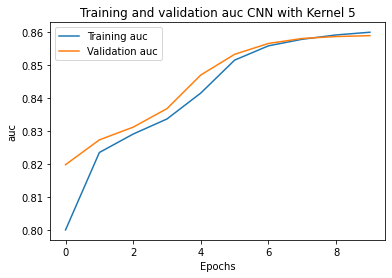

In [110]:
#Training and validation accuracy graph for CNN model
plt.plot(hist_cnn.history['auc'],label="Training auc")
plt.plot(hist_cnn.history['val_auc'],label="Validation auc")
plt.title('Training and validation auc CNN with Kernel 5')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

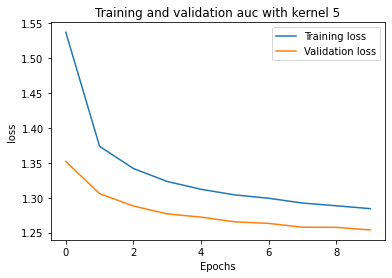

In [109]:
#Training and validation loss plot for CNN model

plt.plot(hist_pre_trained.history['loss'],label="Training loss")
plt.plot(hist_pre_trained.history['val_loss'],label="Validation loss")
plt.title('Training and validation auc with kernel 5')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**CNN WITH KERNEL SIZE 3**

In [68]:
#CNN with kernel size=3
#CNN With Text classification with kernal size = 3

CNN_model1 = Sequential()
CNN_model1.add(Embedding(dictionary_length,embedding_size,input_length=input_length))
CNN_model1.add(Conv1D(50,3,padding='valid',activation='relu',strides=1,kernel_regularizer=tf.keras.regularizers.l2(0.2)))
#CNN_model1.add(Dropout(0.25))
CNN_model1.add(GlobalAveragePooling1D())
#CNN_model1.add(Dropout(0.25))
CNN_model1.add(Dense(25, activation='relu'))
CNN_model1.add(Dense(10, activation='softmax'))

CNN_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['AUC'])

CNN_model1.summary()


#Fitting the model to the test data and validating with the validation data
hist_cnn1 = CNN_model1.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val, y_val))

#Testing the accuracy of model using the test data.
print('\n => Evaluating the model on test data')
CNN_Kernel2_results = CNN_model1.evaluate(X_test, y_test, batch_size=batch_size)
test_loss, cnn_kernal_3_test_acc = CNN_Kernel2_results
print("Model accuracy on test data: {}% ".format( round(cnn_kernal_3_test_acc*100,2)))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 50)           50000     
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 50)            7550      
                                                                 
 global_average_pooling1d_2   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 10)                260       
                                                                 
Total params: 59,085
Trainable params: 59,085
Non-trainable params: 0
__________________________________________________

In [70]:
auc_cnn_kernal_3_test_acc = round(cnn_kernal_3_test_acc*100,2)

In [71]:
CNN_model1.save('part_1/Model_7.hdf5')


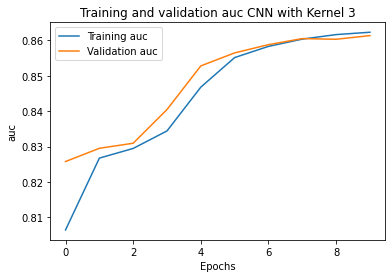

In [108]:
#Training and validation accuracy graph for CNN model
plt.plot(hist_cnn1.history['auc'],label="Training auc")
plt.plot(hist_cnn1.history['val_auc'],label="Validation auc")
plt.title('Training and validation auc CNN with Kernel 3')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

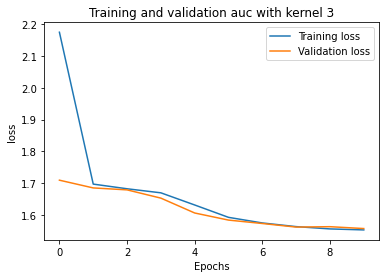

In [107]:
#Training and validation loss plot for CNN model

plt.plot(hist_cnn1.history['loss'],label="Training loss")
plt.plot(hist_cnn1.history['val_loss'],label="Validation loss")
plt.title('Training and validation auc with kernel 3')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**CNN LSTM WITH KERNEL SIZE 5**

In [74]:
#multiple CNN model with kernel size 5 passed to LSTM layer

pool_size=2
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(dictionary_length,embedding_size,input_length=input_length))
cnn_lstm_model.add(Conv1D(50, 3, padding='valid',activation='relu'))
#cnn_lstm_model.add(GlobalAveragePooling1D())
cnn_lstm_model.add(MaxPooling1D(pool_size=pool_size))
cnn_lstm_model.add(LSTM(25,dropout=0.2, recurrent_dropout=0.2))
#cnn_lstm_model.add(Dropout(0.2))
#cnn_lstm_model.add(Dense(25, activation='relu'))
cnn_lstm_model.add(Dense(10, activation='softmax'))

#compiling the model
cnn_lstm_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['AUC'])

cnn_lstm_model.summary()


#Fitting the model to the test data and validating with the validation data
hist_cnn_lstm = cnn_lstm_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val, y_val))

#Testing the accuracy of model using the test data.
print('\n => Evaluate on test data')
CNN_Kernel3_results = cnn_lstm_model.evaluate(X_test, y_test, batch_size=batch_size)
test_loss, cnn_lstm_test_acc = CNN_Kernel3_results
print("Model accuracy is: {}% ".format( round(cnn_lstm_test_acc*100,2)))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 50)           50000     
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 50)            7550      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 50)           0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 25)                7600      
                                                                 
 dense_15 (Dense)            (None, 10)                260       
                                                                 
Total params: 65,410
Trainable params: 65,410
Non-trainable params: 0
__________________________________________________

In [75]:
auc_cnn_lstm_test_acc = round(cnn_lstm_test_acc*100,2)

In [77]:
#saving cnn_lstm model
cnn_lstm_model.save('/content/drive/MyDrive/Deep Learning/part1/Model_8.hdf5')


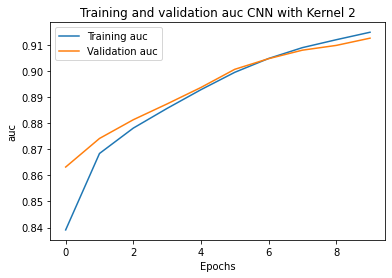

In [79]:
#Training and validation accuracy graph for CNN model
plt.plot(hist_cnn_lstm.history['auc'],label="Training auc")
plt.plot(hist_cnn_lstm.history['val_auc'],label="Validation auc")
plt.title('Training and validation auc CNN with Kernel 2')
plt.xlabel('Epochs')
plt.ylabel('auc')
plt.legend()

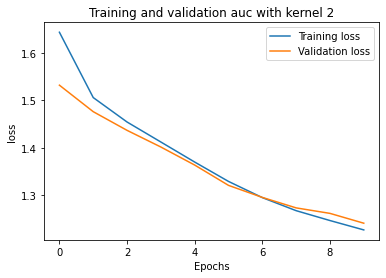

In [80]:
#Training and validation loss plot for CNN model

plt.plot(hist_cnn_lstm.history['loss'],label="Training loss")
plt.plot(hist_cnn_lstm.history['val_loss'],label="Validation loss")
plt.title('Training and validation auc with kernel 2')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

**COMPARISON TO NON-NEURAL METHODS**

**DECISION TREE CLASSIFIER**

In [82]:
x = pd.Categorical(df['Genre'])               
df['Genre']=x.codes
x_train2, x_test2, y_train2, y_test2 = train_test_split(post_seq_padded, df['Genre'], test_size=0.30, random_state=2)

In [84]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results

# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')


Decision Tree Classifier Created


In [88]:
# Predicting the values of test data
import sklearn.metrics as metrics

y_pred = dtree.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)


0.8363975702509437


**LogisticRegression**

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear").fit(x_train2, y_train2)
preds = clf.predict_proba(x_test2)
roc_auc_logistic = roc_auc_score(y_test2,preds, multi_class='ovr')
print(roc_auc_logistic) 

0.5479946107274234


**COMPARISON OF ALL ALGORITHMS RESULTS**

In [90]:
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["RNN with traditional features", (score_SimpleRNN,3)])
x.add_row(["LSTM Single Layer with traditional features", (score_LSTM,3)])
x.add_row(["Multi Layer LSTM with Embedding features", (score_MultiLSTM ,3)])


x.add_row(["Pretrained Embedding with GNEWS-SWIVEL EMBEDDING  ", (auc_pre_trained_model_test_acc,3)])
x.add_row(["Pretrained Embedding fly model", (auc_model_fly_test_acc,3)])

x.add_row(["CNN Text Classification with kernel size=5", (auc_cnn_kernal_5_test_acc,3)])
x.add_row(["CNN Text Classification with kernel size=3", (auc_cnn_kernal_3_test_acc,3)])
x.add_row(["CNN Text Classification with kernel size=2", (auc_cnn_lstm_test_acc,3)])



x.add_row(["Logistic Regression", (roc_auc_logistic,3)])
x.add_row(["Decision Tree", (auc,3)])

print(x)
print('\n')



Deatiled Performance of the all models
+----------------------------------------------------+-----------------------------------------------+
|                       Model                        |                    Accuracy                   |
+----------------------------------------------------+-----------------------------------------------+
|           RNN with traditional features            |  ([1.5551918745040894, 0.859252393245697], 3) |
|    LSTM Single Layer with traditional features     | ([1.4086586236953735, 0.8889914155006409], 3) |
|      Multi Layer LSTM with Embedding features      | ([1.8069355487823486, 0.7919185161590576], 3) |
| Pretrained Embedding with GNEWS-SWIVEL EMBEDDING   |                   (90.98, 3)                  |
|           Pretrained Embedding fly model           |                   (86.49, 3)                  |
|     CNN Text Classification with kernel size=5     |                   (86.09, 3)                  |
|     CNN Text Classification wi

**BEST TWO MODELS FROM PRETRAINED AND SCRATCH**

In [112]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Pretrained Embedding with GNEWS-SWIVEL EMBEDDING",round(auc_pre_trained_model_test_acc,3)])
x.add_row(["CNN Text Classification with kernel size=2",round(auc_cnn_lstm_test_acc,3)])
print(x)
print('\n')



Best Model.
+--------------------------------------------------+----------+
|                      Model                       | Accuracy |
+--------------------------------------------------+----------+
| Pretrained Embedding with GNEWS-SWIVEL EMBEDDING |  90.98   |
|    CNN Text Classification with kernel size=2    |  91.29   |
+--------------------------------------------------+----------+




**GENRE PREDICTION USING BEST PERFORMING MODEL**

In [29]:
model = load_model('/content/drive/MyDrive/Deep Learning/part1/Model_8.hdf5')

In [30]:
pred = model.predict(X_test[:10])
pred = pred.argmax(axis=1)

In [32]:
from sklearn import preprocessing
tge = preprocessing.LabelEncoder()
encGen=tge.fit_transform(df['Genre'])
df['Genre'] = encGen
predictions = tge.inverse_transform(pred)

In [33]:
genre = pd.DataFrame()
genre['Song Lyrics'] = df.Lyrics.head(10)
genre['Prediction of Genre'] = predictions
genre

,Song Lyrics,Prediction of Genre
0,"It starts with pain, folowed by hate Fueled by...",5
1,Fredom! Alone again again alone Patiently wait...,9
2,"Biting the hand that feds you, lying to the vo...",9
3,You say you know just who I am But you can't i...,7
4,My heart is beating faster can't control these...,7
5,You say you know just who I am But you can't i...,7
6,Loking for light in the darknes Is something f...,5
7,"Mother mother can you hear me,I kep trying Jus...",9
8,"It was you, That showed me who I am, And taugh...",9
9,I hear the words you say to me I se the way y...,9
